In [1]:
import numpy as np
import pandas as pd
import random
import math
from copy import deepcopy 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import matrix_power
import networkx as nx 

In [2]:
node=pd.read_csv(r'C:\Users\PLUS\Desktop\Linkpy\sample dataset.txt')
number_of_node=int(node.columns.tolist()[0])
node = node[node.columns.tolist()[0]].str.split(" ", n = 1, expand = True)
node=node.values
node = node.astype(np.int)

C:\Users\PLUS\AppData\Local\Temp/ipykernel_4368/2407552744.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  node = node.astype(np.int)


In [3]:
adjaceny_matrix=np.zeros([number_of_node,number_of_node])


In [4]:
for i in range(len(node)):
    v_i=node[i][0]-1
    v_j=node[i][1]-1
    adjaceny_matrix[v_i,v_j]=1
    adjaceny_matrix[v_j,v_i]=1
m=(1/2)*(np.sum(adjaceny_matrix)  ) 

In [5]:
G = nx.Graph()

vertex=[]
for i in range(number_of_node):
    vertex.append(i)

In [6]:
for i in range(number_of_node): 
     for j in range( 0,number_of_node): 
        if adjaceny_matrix[i][j] == 1: 
            G.add_edge(i,j)
G.add_nodes_from(vertex)

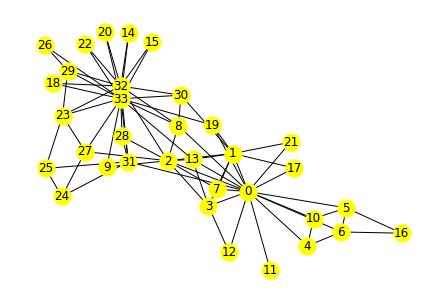

In [7]:
nx.draw( G,with_labels = True,node_color='yellow' ) 
plt.show()

In [8]:
def habitat_safty():
    habitae=[]
    for i in range(20):
        temp_gene=[]
        for j in range(number_of_node):
            nonzeroind_index=np.nonzero(adjaceny_matrix[j,:])
            conncted_node_j=random.choice(nonzeroind_index[0])
            temp_gene.append(conncted_node_j)
            
        habitae.append(temp_gene)
       
    return habitae
       

In [9]:
def fitness(choromosome):
    cluster=[]
    
    fetnes=[]
    choromosome_node=set()
    for i in range(number_of_node):
        choromosome_node.add(i)
    
    c={} # ci in formula
    for i in range(len(choromosome)):
        c={} 
        f=0
        for j in range(number_of_node):
            choromosome_node.add(j)
        temp_cluster=[]
        adjaceny_matrix_choromosome=np.zeros([number_of_node,number_of_node])
        for j in range(34):
            adjaceny_matrix_choromosome[j][choromosome[i][j]]=1
            adjaceny_matrix_choromosome[choromosome[i][j]][j]=1
        #Diagnosis of clusters
        while(i>-1):
            temp_s=set()
            temp_l=[]
            x=choromosome_node.pop()
            temp_l.append(x)
            for j in temp_l:
                for k in range(number_of_node):
                    
                    if(adjaceny_matrix_choromosome[j][k]==1):
                        if k not in temp_l:
                            temp_l.append(k)
                            choromosome_node.remove(k)
                 
            temp_cluster.append(temp_l) 
            if (len(choromosome_node)==0):
                break
                
        cluster.append(temp_cluster)
        
        for j in range(len(temp_cluster)):
            for k in range(len(temp_cluster[j])):
                c[temp_cluster[j][k]]=j
        for j in range(number_of_node):
            k_i=np.sum(adjaceny_matrix[j,:])
            for t in range(number_of_node):
                k_j=np.sum(adjaceny_matrix[:,t])
                if(c[j]==c[t]):
                    f=f+ adjaceny_matrix[j][t]-((k_i*k_j)/(2*m))
        fetnes.append(f/(2*m)) 
                         
     
  
    return fetnes,cluster;                      
                         

In [10]:
def hatch_egg(habitat):
    egg=[]
    alpha=1
    for i in range(len(habitat)):
        number_of_egg=random.randint(5,10)
        for j in range(number_of_egg):
            indexs_egg=random.sample(range(0,number_of_node),alpha*(j+1))
            temp_egg=[]
            temp_egg=deepcopy(habitat[i])
            for k in indexs_egg:
                nonzeroind_index=np.nonzero(adjaceny_matrix[k,:])
                conncted_node_j=random.choice(nonzeroind_index[0])
                temp_egg[k]=conncted_node_j
                
            egg.append(temp_egg)
              
    fetnes,cluster=fitness(egg)
    sum_fitnes=sum(fetnes)
    probability_fitness=[]    
    for i in range(len(egg)):
        probability_fitness.append(abs((fetnes[i]))/(sum_fitnes))

    roulette_selection=np.random.choice(fetnes,int(0.1*len(egg)), p=probability_fitness) #roulette selection
    roulette_selection=list(roulette_selection)
    index_survival=[]
    for i in range(len(roulette_selection)):
        index_survival.append(fetnes.index(roulette_selection[i]))
        
    egg=np.array(egg)    
    egg=egg[index_survival,:]
    egg=egg.tolist()
    habitat=list(habitat)
    habitat.extend(egg)
    
    #print(habitat)
    return habitat

In [11]:
def clustring_cuckoo(habitat):
    
    fetnes,c=fitness(habitat)
    fetnes_2_dimential=np.array(fetnes)
    fetnes_2_dimential=pd.DataFrame(fetnes_2_dimential)
    fetnes_2_dimential['1']=np.power(fetnes_2_dimential, 5)
    fetnes_2_dimential=fetnes_2_dimential.values
    kmeans = KMeans(n_clusters=4).fit(fetnes_2_dimential)   
    #plt.scatter(fetnes_2_dimential[:,0],fetnes_2_dimential[:,1], c=kmeans.labels_, cmap='rainbow')
    #plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',marker='x',s=200)
    #plt.show()
    labels = kmeans.labels_
    cluster_mean_fetnes=[]
    cluster_fetnes=[]
    for i in range(4):
        cluster_mean_fetnes.append(fetnes_2_dimential[np.where(labels==i)].mean(0)[0])
        cluster_fetnes.append(fetnes_2_dimential[np.where(labels==i)][:,0])
 
    max_mean_cluster_index=np.argmax(cluster_mean_fetnes)  
    goal_cluster_fetnes=[]
    goal_cluster_fetnes=cluster_fetnes[max_mean_cluster_index].tolist()
    index_habitat=[]
    habitat_goal_cluster=[]
    temp_habitat=[]
    
    for i in range(len(goal_cluster_fetnes)):
        index_habitat.append(fetnes.index(goal_cluster_fetnes[i]))
        
    for i in index_habitat:
        habitat_goal_cluster.append(habitat[i])

    for i in range(len(fetnes)):
        if i not in index_habitat:
            temp_habitat.append(habitat[i])
    for i in range(len(temp_habitat)):
        number_of_gene_copy_habitat=random.randint(20,30)
        indexs_copy_gene_habitat=random.sample(range(0,number_of_node),number_of_gene_copy_habitat)
        
        inedex_habitat_goal_cluster=random.randint(0,len(habitat_goal_cluster)-1)

        for j in indexs_copy_gene_habitat:
            temp_habitat[i][j]=habitat_goal_cluster[inedex_habitat_goal_cluster][j]
    
    habitat=[]
    habitat.extend(habitat_goal_cluster)
    habitat.extend(temp_habitat)
    habitat=np.array(habitat)
    habitat.tolist()
    #print(len(habitat))
    return habitat

In [12]:
def kill_cuckoo(habitat):
    if(len(habitat)>75):
        habitat=list(habitat)
        fetnes,c=fitness(habitat)
        index_best_cuckoo=np.argmax(fetnes)
        best_cuckoo=habitat[index_best_cuckoo]
        fetnes.pop(index_best_cuckoo)
        habitat.pop(index_best_cuckoo)
        sum_fitnes=sum(fetnes)
        probability_fitness=[]    
        for i in range(len(habitat)):
            probability_fitness.append(abs((fetnes[i]))/(sum_fitnes))
        
        roulette_selection=np.random.choice(fetnes,int(0.1*len(habitat)), p=probability_fitness) #roulette selection
        roulette_selection=list(roulette_selection)
        index_survival=[]
        for i in range(len(roulette_selection)):
            index_survival.append(fetnes.index(roulette_selection[i]))
        habitat=np.array(habitat)  
        habitat=habitat[index_survival,:]
        habitat=list(habitat)
        habitat.append(best_cuckoo)
    return habitat 


In [17]:
habitat=habitat_safty()


In [18]:
i=0
j=0
length_fetnes=[]
while j>-1:
    habitat=hatch_egg(habitat)
    habitat=clustring_cuckoo(habitat)
    
    
    habitat=kill_cuckoo(habitat)
    fetnes,cluster=fitness(habitat)
    if length_fetnes!=[]:
        if max(fetnes)==length_fetnes[-1]:
            i=i+1
            if i==50:
                break
        else:
            i=0
            
    length_fetnes.append(max(fetnes))
    print(max(fetnes))
    print('i:',i)
    
   
    

0.3990795529257049
i: 0
0.40203813280736184
i: 0
0.4172419460880995
i: 0
0.4172419460880995
i: 1
0.4172419460880995
i: 2
0.4174063116370803
i: 0
0.4174063116370803
i: 1
0.4174063116370803
i: 2
0.4174063116370803
i: 3
0.4174063116370803
i: 4
0.4174063116370803
i: 5
0.4174063116370803
i: 6
0.4174063116370803
i: 7
0.4174063116370803
i: 8
0.4174063116370803
i: 9
0.4174063116370803
i: 10
0.4174063116370803
i: 11
0.4174063116370803
i: 12
0.4174063116370803
i: 13
0.4174063116370803
i: 14
0.4174063116370803
i: 15
0.4174063116370803
i: 16
0.4174063116370803
i: 17
0.4188034188034182
i: 0
0.4188034188034182
i: 1
0.41978961209730387
i: 0
0.41978961209730387
i: 1
0.41978961209730387
i: 2
0.41978961209730387
i: 3
0.41978961209730387
i: 4
0.41978961209730387
i: 5
0.41978961209730387
i: 6
0.41978961209730387
i: 7
0.41978961209730387
i: 8
0.41978961209730387
i: 9
0.41978961209730387
i: 10
0.41978961209730387
i: 11
0.41978961209730387
i: 12
0.41978961209730387
i: 13
0.41978961209730387
i: 14
0.419789612

Text(0, 0.5, 'fitnes')

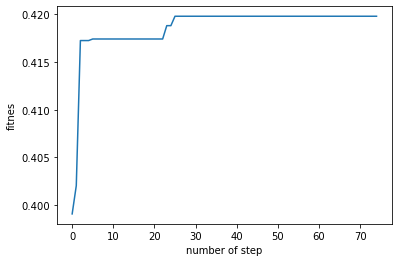

In [19]:
step=list(range(len(length_fetnes)))
plt.plot(step, length_fetnes)
plt.xlabel('number of step')
plt.ylabel('fitnes')

In [20]:
i=np.argmax(fetnes)
cluster=cluster[i]
print('maximum fetnes Q is:', max(fetnes))

maximum fetnes Q is: 0.41978961209730387


In [21]:
cluster

[[0, 11, 12, 13, 19, 21, 1, 3, 7, 17, 2],
 [4, 6, 10, 5, 16],
 [8, 33, 9, 14, 18, 20, 22, 26, 29, 32, 15, 30],
 [23, 27, 24, 25, 31, 28]]

In [22]:
G = nx.Graph()
vertex=[]
for i in range(number_of_node):
    vertex.append(i)

In [23]:
for i in range(number_of_node): 
     for j in range( 0,number_of_node): 
        if adjaceny_matrix[i][j] == 1: 
            G.add_edge(i,j)
G.add_nodes_from(vertex)
 

In [24]:
color_map={}
color=[]
color_final=[]
for i in range(len(cluster)):
      for j in cluster[i]:
        if(i==0):
              color_map[j]='yellow'
        if(i==1):
              color_map[j]='red'
        if(i==2):
              color_map[j]='pink'  
        if(i==3):
              color_map[j]='green'
for i in range(34):
    color.append(color_map[i])
for i in list(G):
    color_final.append(color_map[i])

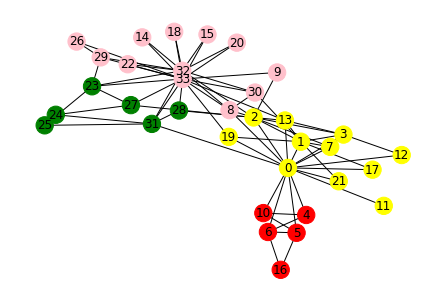

In [26]:
nx.draw(G, node_color=color_final, with_labels=True)
